In [6]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [7]:
# 시각화 함수
def plot_image(image, shape=[28, 28]):
    plt.imshow(image.reshape(shape), cmap="Greys", interpolation="nearest")
    plt.axis("off")
    
def plot_multiple_images(images, n_rows, n_cols, pad=2):
    images = images - images.min()  # 최소값을 0으로 만들어 패딩이 하얗게 보이도록 합니다.
    w,h = images.shape[1:]
    image = np.zeros(((w+pad)*n_rows+pad, (h+pad)*n_cols+pad))
    for y in range(n_rows):
        for x in range(n_cols):
            image[(y*(h+pad)+pad):(y*(h+pad)+pad+h),(x*(w+pad)+pad):(x*(w+pad)+pad+w)] = images[y*n_cols+x]
    plt.imshow(image, cmap="Greys", interpolation="nearest")
    plt.axis("off")

In [8]:
# 3D 데이터셋 만들기
np.random.seed(42)
m = 200
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
data = np.empty((m,3))
data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) /2
data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)

# 데이터 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(data[:100])
X_test = scaler.transform(data[100:])

X_train.shape : (100, 3)


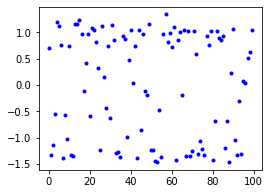

In [17]:
fig = plt.figure(figsize=(4,3))
plt.plot(X_train[:,0], "b.")
print('X_train.shape :', X_train.shape)
plt.show()

In [28]:
## layer parameters
n_inputs = 3
n_hidden = 2
n_outputs = n_inputs # 오토인코더: input,output 크기가 같다.

## autoencoder
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden, activation=None)
outputs = tf.layers.dense(hidden, n_outputs)


## train parameters
learning_rate = 0.01
n_epochs = 1000
pca = hidden

## loss
reconstruction_loss = tf.reduce_mean(tf.square(outputs-X)) # MSE

## optimizer
train_op = tf.train.AdamOptimizer(learning_rate).minimize(reconstruction_loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        sess.run(train_op, feed_dict={X: X_train})
    pca_val = sess.run(pca, feed_dict={X: X_train})

pca_val.shape : (100, 2)


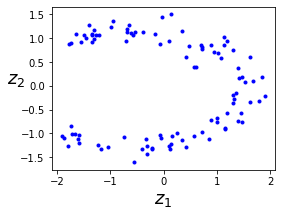

In [29]:
fig = plt.figure(figsize=(4,3))
plt.plot(pca_val[:,0], pca_val[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
print('pca_val.shape :', pca_val.shape) # 차원 축소 된것 확인.
plt.show()